https://drive.google.com/drive/folders/1ZP7jsWhF7hvLC_Ld7xSwV3fb2XXUyP4U?usp=drive_link

pertama kita lakukan adalan mengimport library yang dibutuhkan

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt


kita akan mencoba menampilkan sebuah data citra sebagai contoh

In [12]:
image_path = 'African Wildlife/buffalo/001.jpg'

In [13]:
image_bytes = tf.io.read_file(image_path)

In [14]:
image_tensor = tf.image.decode_image(image_bytes)

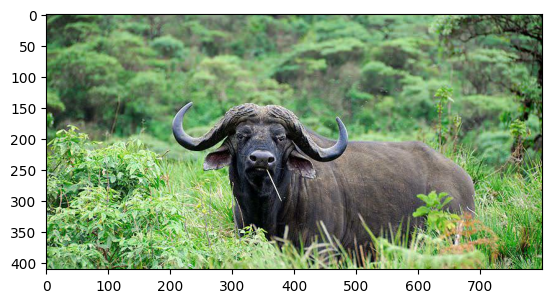

In [15]:
plt.imshow(image_tensor)
plt.show()

untuk melakukan data image generator yang pertama kali kita lakukan adalah mengimport library yang dibutuhkan 

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpig
import os

menginisialisasi apa saja yang akan kita lakukan pada data citra kita nantinya seperti rescale,rotation dll
IMG_PATH = 'archive1\dataset': Baris ini menentukan path atau direktori tempat Anda menyimpan dataset gambar. Anda harus mengganti nilai 'archive1\dataset' dengan path yang sesuai dengan lokasi dataset gambar Anda di sistem file Anda.
img_datagen = ImageDataGenerator(...): Di sini Anda membuat objek img_datagen yang menggunakan ImageDataGenerator untuk melakukan augmentasi data gambar. ImageDataGenerator adalah alat yang digunakan untuk memproses gambar-gambar dalam dataset sebelum digunakan dalam pelatihan model. Parameter-parameter dalam objek img_datagen ini mengontrol jenis augmentasi yang akan diterapkan pada gambar. Misalnya, rescale=1./255 akan mengubah skala intensitas piksel gambar, rotation_range mengatur rentang rotasi yang mungkin, horizontal_flip mengizinkan pemutaran horizontal gambar, dan parameter-parameter lainnya mengendalikan perubahan lain yang bisa diterapkan pada gambar.

In [5]:
IMG_PATH = 'archive1\dataset'
img_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=0.45,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest'
)

selanjutnya kita membagi data menjadi validasi,train dan test untuk data citra kita
train_generator: Generator ini akan digunakan untuk memuat data pelatihan. generator ini untuk mengambil data dari direktori IMG_PATH, menentukan ukuran gambar target (150x150 piksel), dan menentukan batch size sebesar 32.  mengatur shuffle=True agar data acak saat dimuat dan class_mode='categorical' karena dataset ini adalah masalah klasifikasi multikelas. Subset 'training' menunjukkan bahwa generator ini digunakan untuk pelatihan.
validation_generator: Generator ini akan digunakan untuk memuat data validasi. Konfigurasi generator ini hampir sama dengan train_generator, tetapi digunakan untuk data validasi. 

In [12]:
IMG_PATH = 'archive1/dataset'
img_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,
)

train_generator = img_datagen.flow_from_directory(
    IMG_PATH,
    target_size=(150,150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='training'
)

validation_generator = img_datagen.flow_from_directory(
    IMG_PATH,
    target_size=(150,150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='validation'
)

Found 450 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


kita akan menambahkan layer pada data citra kita yang akan di tain maupun yang akan kita test nantinya 

In [9]:
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(256, (3,3), activation='relu',
input_shape=[150,150,3]),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(5, activation='softmax')
])

selanjutnya kita akan mengcompile data citra kita

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
metrics=['accuracy'])

lalu kita akan memberikan epocs sebagai jumlah untuk trainningnya nanti 

In [13]:
hasil = model.fit(train_generator,validation_data=validation_generator,
epochs=10)

Epoch 1/10
15/15 [==============================] - 146s 10s/step - loss: 1.6851 - accuracy: 0.2222 - val_loss: 1.6065 - val_accuracy: 0.2400
Epoch 2/10
15/15 [==============================] - 145s 10s/step - loss: 1.5607 - accuracy: 0.2733 - val_loss: 1.4477 - val_accuracy: 0.3200
Epoch 3/10
15/15 [==============================] - 139s 10s/step - loss: 1.3743 - accuracy: 0.4244 - val_loss: 1.3393 - val_accuracy: 0.4400
Epoch 4/10
15/15 [==============================] - 138s 9s/step - loss: 1.2101 - accuracy: 0.5000 - val_loss: 1.2873 - val_accuracy: 0.5200
Epoch 5/10
15/15 [==============================] - 139s 10s/step - loss: 1.1622 - accuracy: 0.4844 - val_loss: 1.2659 - val_accuracy: 0.3800
Epoch 6/10
15/15 [==============================] - 138s 9s/step - loss: 1.0514 - accuracy: 0.5822 - val_loss: 1.2481 - val_accuracy: 0.5000
Epoch 7/10
15/15 [==============================] - 140s 9s/step - loss: 0.8397 - accuracy: 0.6889 - val_loss: 1.2157 - val_accuracy: 0.6000
Epoch 8/1

selanjutnya kita akan membuat grafik dengan menggunakan library matplotlip yang akan menetukan atau menunjukkan keakurasian data kita

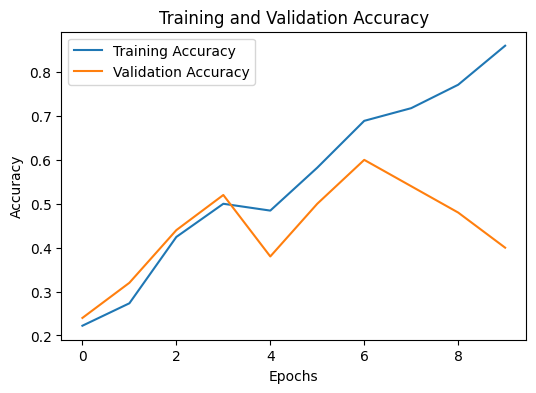

In [21]:
import matplotlib.pyplot as plt

# Hasil pelatihan model Anda
history = hasil

# Visualisasi akurasi
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()
